In [18]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

In [19]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

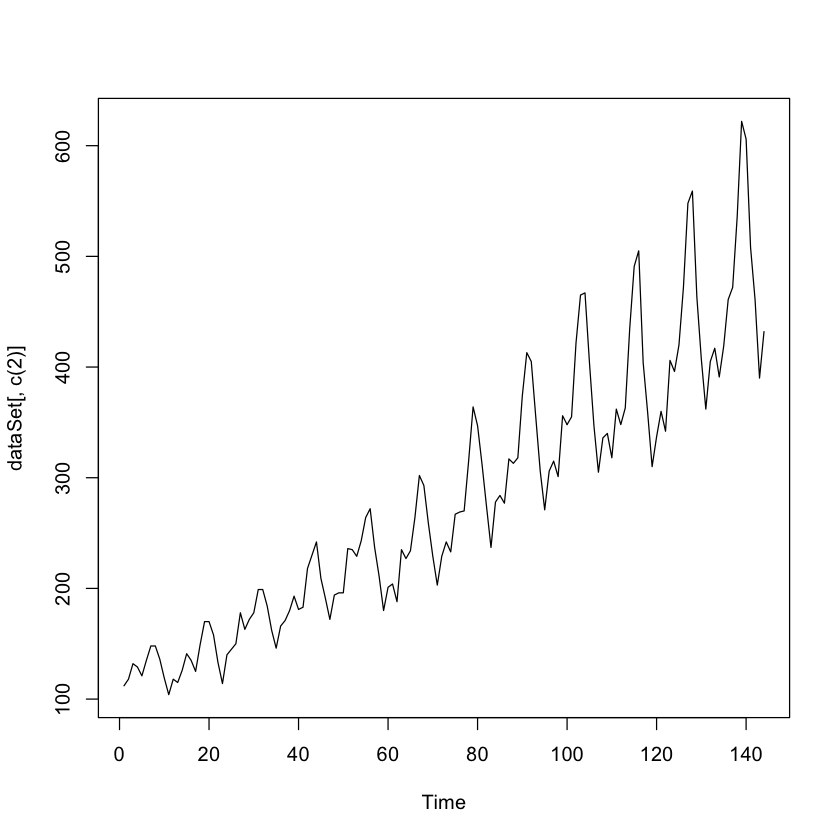

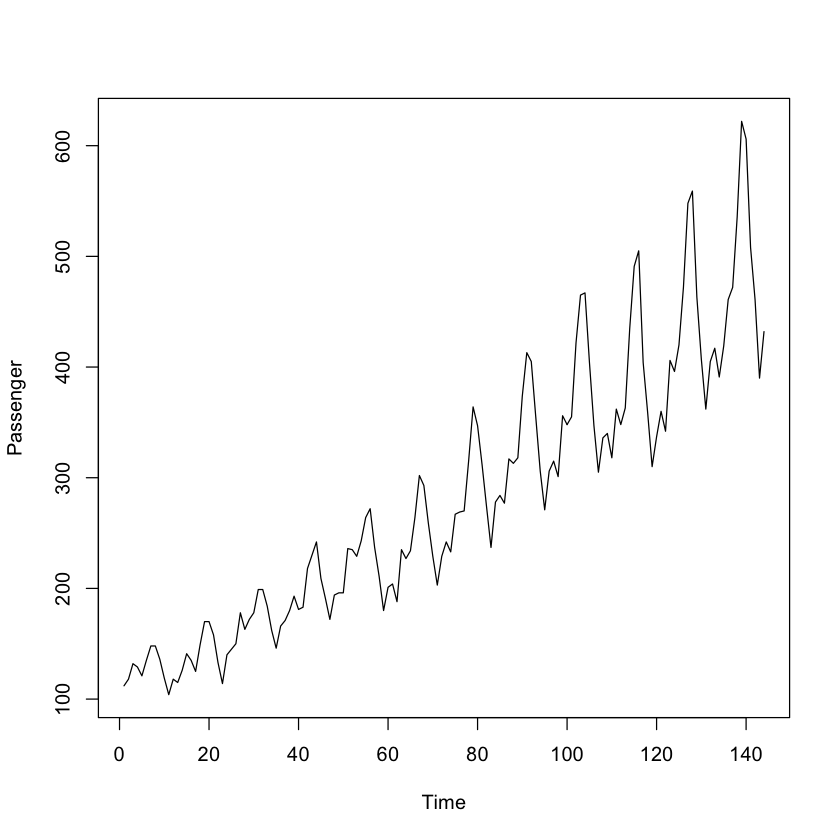

In [20]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [21]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

xhat,level
112.0000,112.0000
117.9996,117.9996
131.9991,131.9991
129.0002,129.0002
121.0005,121.0005
134.9991,134.9991
147.9991,147.9991
148.0000,148.0000
136.0008,136.0008
119.0011,119.0011


    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
145       431.9972 388.7385 475.2559 365.8387 498.1557
146       431.9972 370.8222 493.1723 338.4381 525.5564
147       431.9972 357.0742 506.9202 317.4124 546.5821
148       431.9972 345.4841 518.5104 299.6868 564.3077
149       431.9972 335.2729 528.7215 284.0701 579.9243
150       431.9972 326.0413 537.9532 269.9516 594.0429
151       431.9972 317.5519 546.4425 256.9682 607.0262
152       431.9972 309.6502 554.3443 244.8836 619.1109
153       431.9972 302.2287 561.7658 233.5334 630.4611
154       431.9972 295.2093 568.7852 222.7981 641.1963
155       431.9972 288.5329 575.4615 212.5875 651.4070
156       431.9972 282.1537 581.8407 202.8313 661.1631
157       431.9972 276.0352 587.9592 193.4739 670.5205
158       431.9972 270.1479 593.8466 184.4700 679.5245
159       431.9972 264.4673 599.5272 175.7823 688.2122
160       431.9972 258.9731 605.0214 167.3796 696.6148
161       431.9972 253.6481 610.3464 159.2357 704.7587
162       

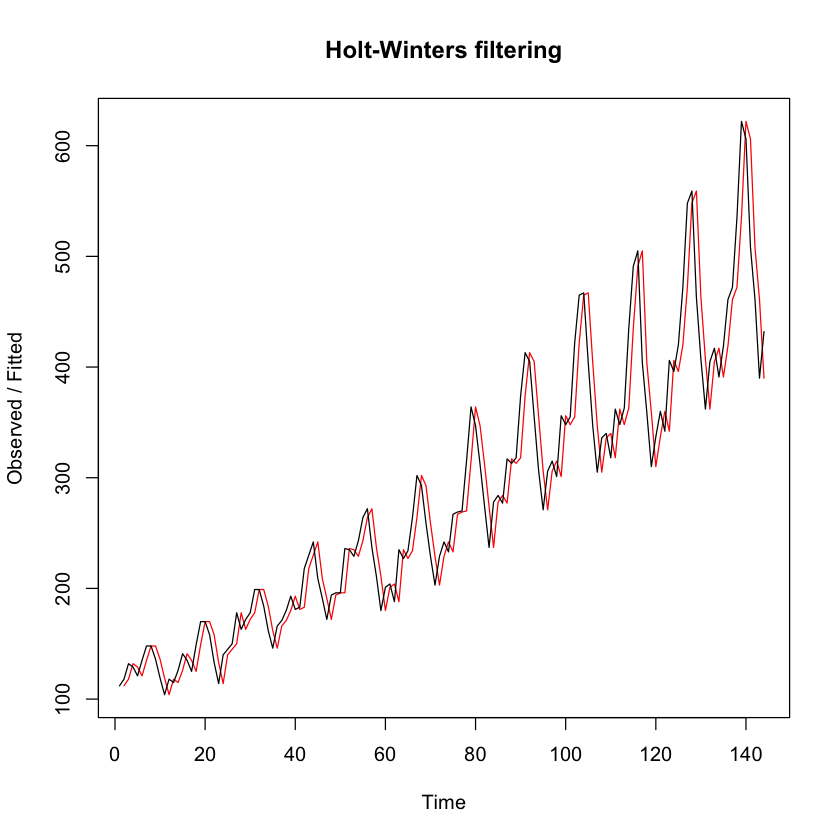

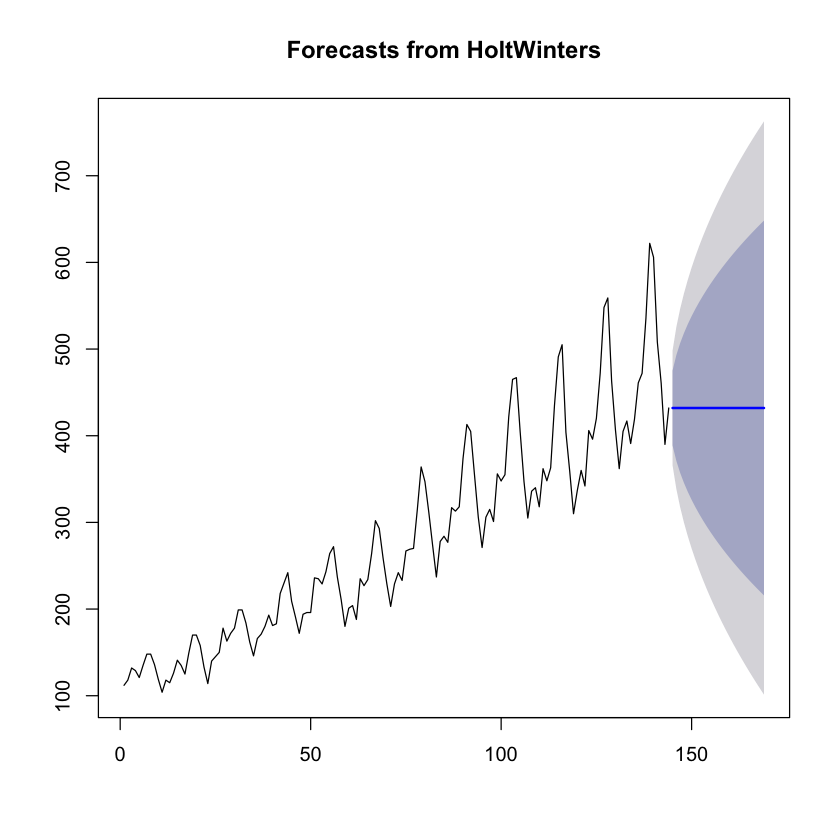

In [22]:
# -----------------------------------------------------------------------------------------
# Simple Exponential Smoothing 
# using HoltWinters Function : WHERE beta=FALSE, gamma=FALSE
# -----------------------------------------------------------------------------------------

# ***********************************************************************
# using Original data
dataSet_forecasts  <- HoltWinters(dataSet, beta=FALSE, gamma=FALSE)

# fitted model
dataSet_forecasts$fitted;  plot(dataSet_forecasts)

# Forecast in Future time horizon
forecast  <- forecast:::forecast.HoltWinters(dataSet_forecasts, h = 25)

# Print and Visualise Forecasted Values
print(forecast)
print(forecast$residuals)
forecast:::plot.forecast(forecast)

xhat,level,trend
124.0000,118,6.000000
138.0257,132,6.025748
134.9967,129,5.996699
126.9517,121,5.951650
140.9776,135,5.977554
154.0002,148,6.000156
153.9808,148,5.980844
141.9230,136,5.922972
124.8492,119,5.849194
109.7821,104,5.782091


    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
145       436.5976 393.1184 480.0768 370.1019 503.0933
146       441.1952 379.6073 502.7832 347.0046 535.3858
147       445.7928 370.2419 521.3437 330.2477 561.3379
148       450.3904 363.0116 537.7693 316.7560 584.0248
149       454.9880 357.1387 552.8374 305.3404 604.6357
150       459.5856 352.2252 566.9461 295.3920 623.7793
151       464.1832 348.0349 580.3316 286.5497 641.8168
152       468.7808 344.4144 593.1473 278.5788 658.9829
153       473.3784 341.2571 605.4998 271.3162 675.4407
154       477.9761 338.4855 617.4666 264.6437 691.3084
155       482.5737 336.0414 629.1059 258.4719 706.6754
156       487.1713 333.8795 640.4631 252.7317 721.6108
157       491.7689 331.9638 651.5739 247.3681 736.1696
158       496.3665 330.2653 662.4677 242.3366 750.3963
159       500.9641 328.7600 673.1682 237.6006 764.3275
160       505.5617 327.4279 683.6954 233.1296 777.9938
161       510.1593 326.2523 694.0663 228.8978 791.4208
162       

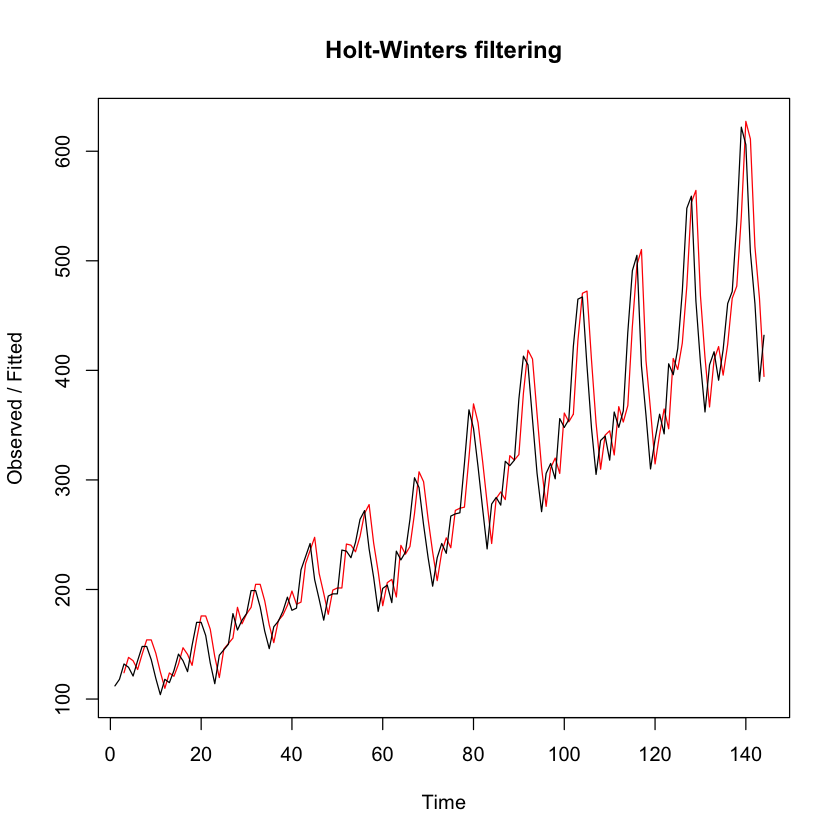

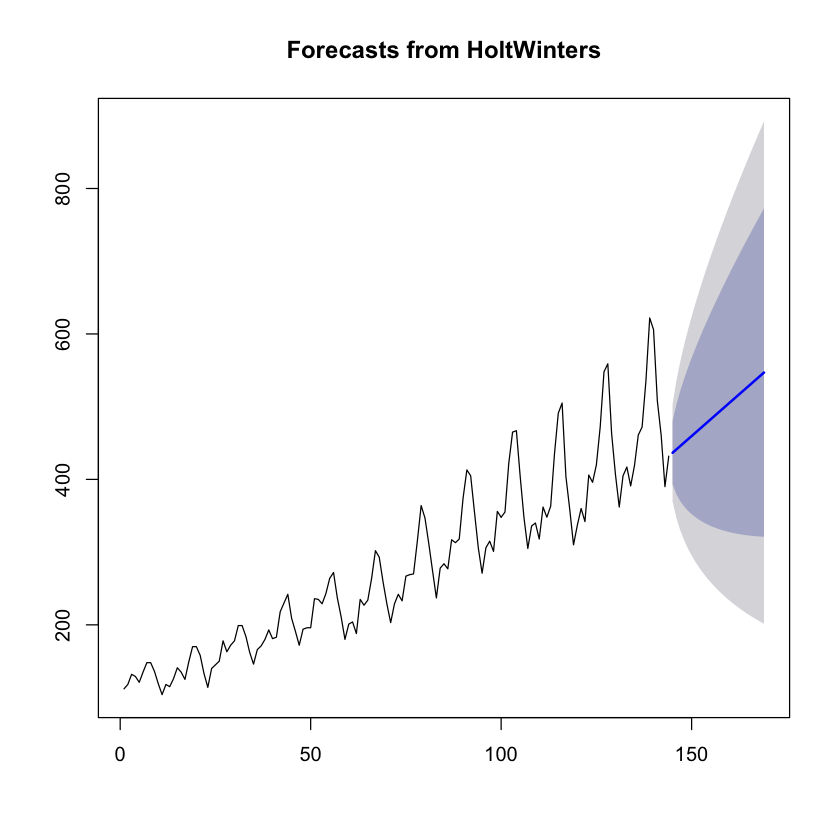

In [23]:
# -----------------------------------------------------------------------------------------
# Holt's Exponential Smoothing
# using HoltWinters Function : WHERE gamma=FALSE
# -----------------------------------------------------------------------------------------

# ***********************************************************************
# using Original data
dataSet_forecasts <- HoltWinters(dataSet, gamma=FALSE)

# fitted model
dataSet_forecasts$fitted;  plot(dataSet_forecasts)

# Forecast in Future time horizon
forecast  <- forecast:::forecast.HoltWinters(dataSet_forecasts, h = 25)

# Print and Visualise Forecasted Values
print(forecast)
print(forecast$residuals)
forecast:::plot.forecast(forecast)